enter chain top
enter chain p1
pyjviz call stack: conditional_join
conditional_join df POSITIONAL_OR_KEYWORD
conditional_join right POSITIONAL_OR_KEYWORD
conditional_join conditions VAR_POSITIONAL
conditional_join how KEYWORD_ONLY
conditional_join sort_by_appearance KEYWORD_ONLY
conditional_join df_columns KEYWORD_ONLY
conditional_join right_columns KEYWORD_ONLY
conditional_join keep KEYWORD_ONLY
conditional_join use_numba KEYWORD_ONLY
pyjviz call stack: conditional_join:select_columns
pyjviz call stack: conditional_join:select_columns
obj deleted <weakref at 0x7fa8c01eb920; dead>
exit chain p1
enter chain p2
pyjviz call stack: select_columns
select_columns df POSITIONAL_OR_KEYWORD
select_columns args VAR_POSITIONAL
select_columns invert KEYWORD_ONLY
pyjviz call stack: select_columns
select_columns df POSITIONAL_OR_KEYWORD
select_columns args VAR_POSITIONAL
select_columns invert KEYWORD_ONLY
pyjviz call stack: conditional_join
conditional_join df POSITIONAL_OR_KEYWORD
conditional_join 

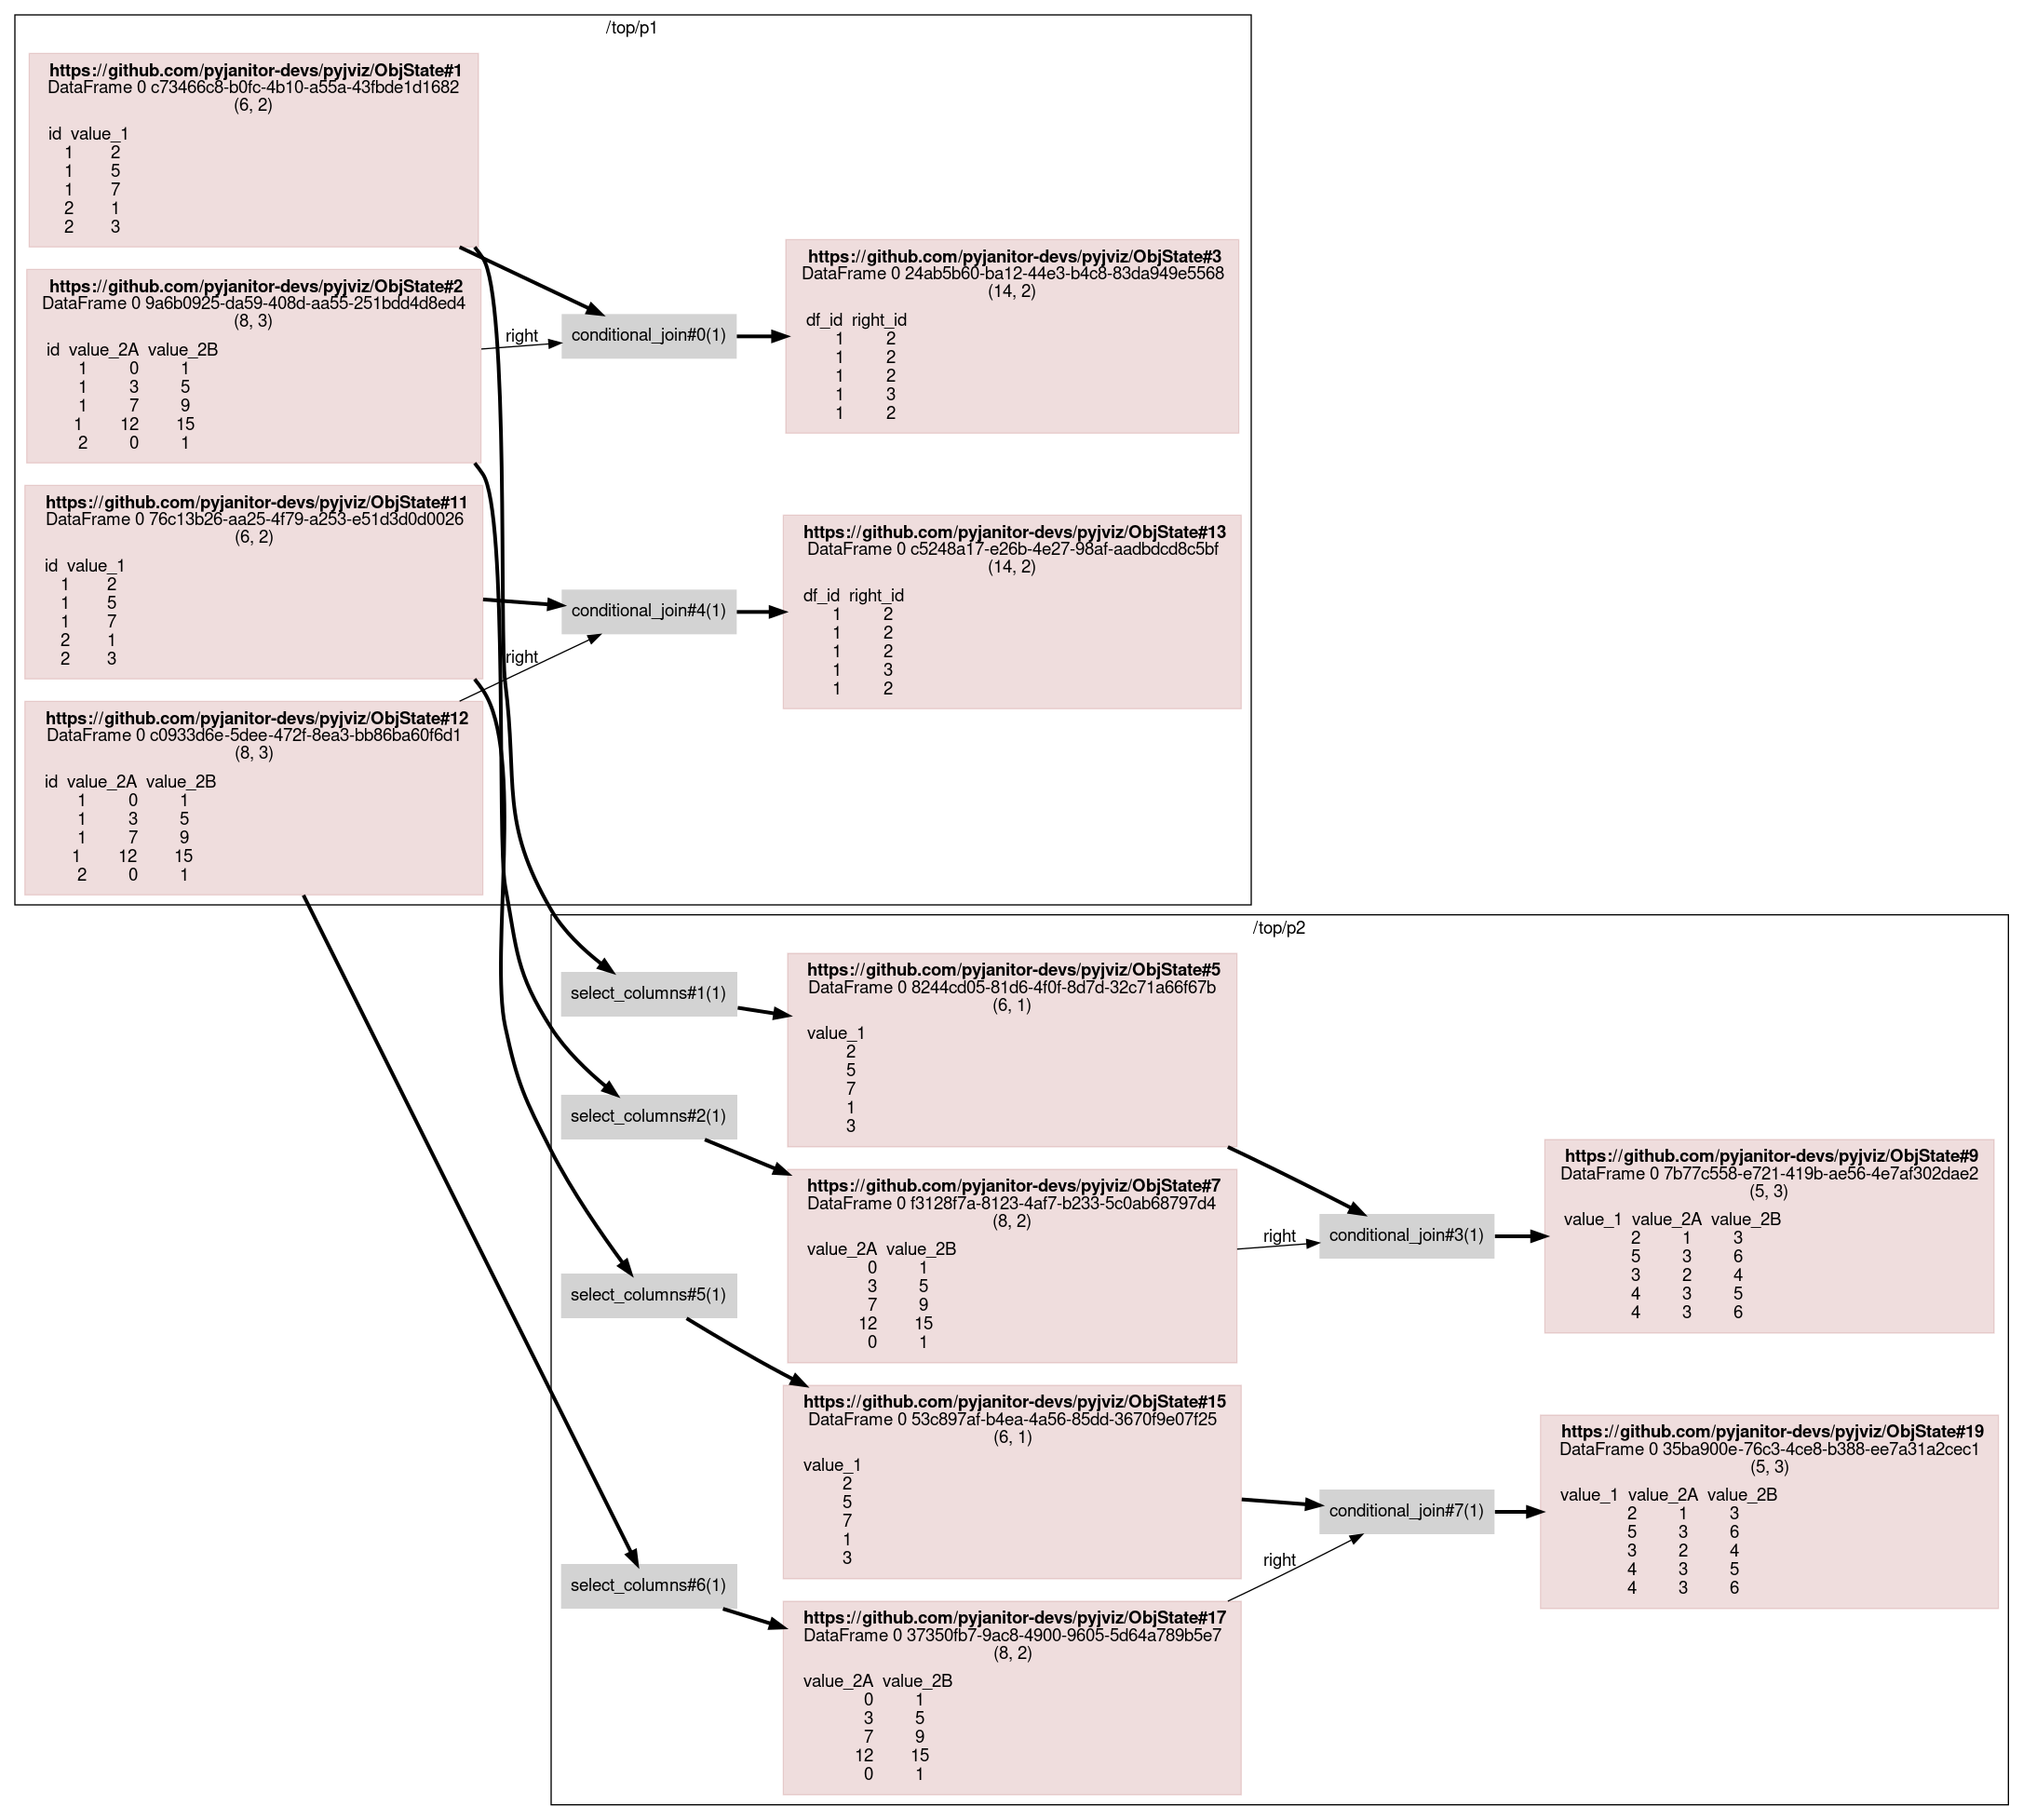

In [3]:
import pandas as pd
import janitor, pyjviz

df1 = pd.DataFrame({'id': [1,1,1,2,2,3], 'value_1': [2,5,7,1,3,4]})

df2 = pd.DataFrame({'id': [1,1,1,1,2,2,2,3],
                        'value_2A': [0,3,7,12,0,2,3,1],
                        'value_2B': [1,5,9,15,1,4,6,3]})

with pyjviz.MethodsChain() as C:
    with pyjviz.MethodsChain("p1") as p1:
        res1 = df1.conditional_join(df2,('id', 'id', "<"),
                                    df_columns = {'id':'df_id'},
                                    right_columns = {'id':'right_id'})
        
    with pyjviz.MethodsChain("p2"):
        res2 = df1.select_columns('value_1').conditional_join(
                                    df2.select_columns('val*'),
                                    ('value_1', 'value_2A', '>'),
                                    ('value_1', 'value_2B', '<'))
C.show()

gvz: <class 'graphviz.sources.Source'>


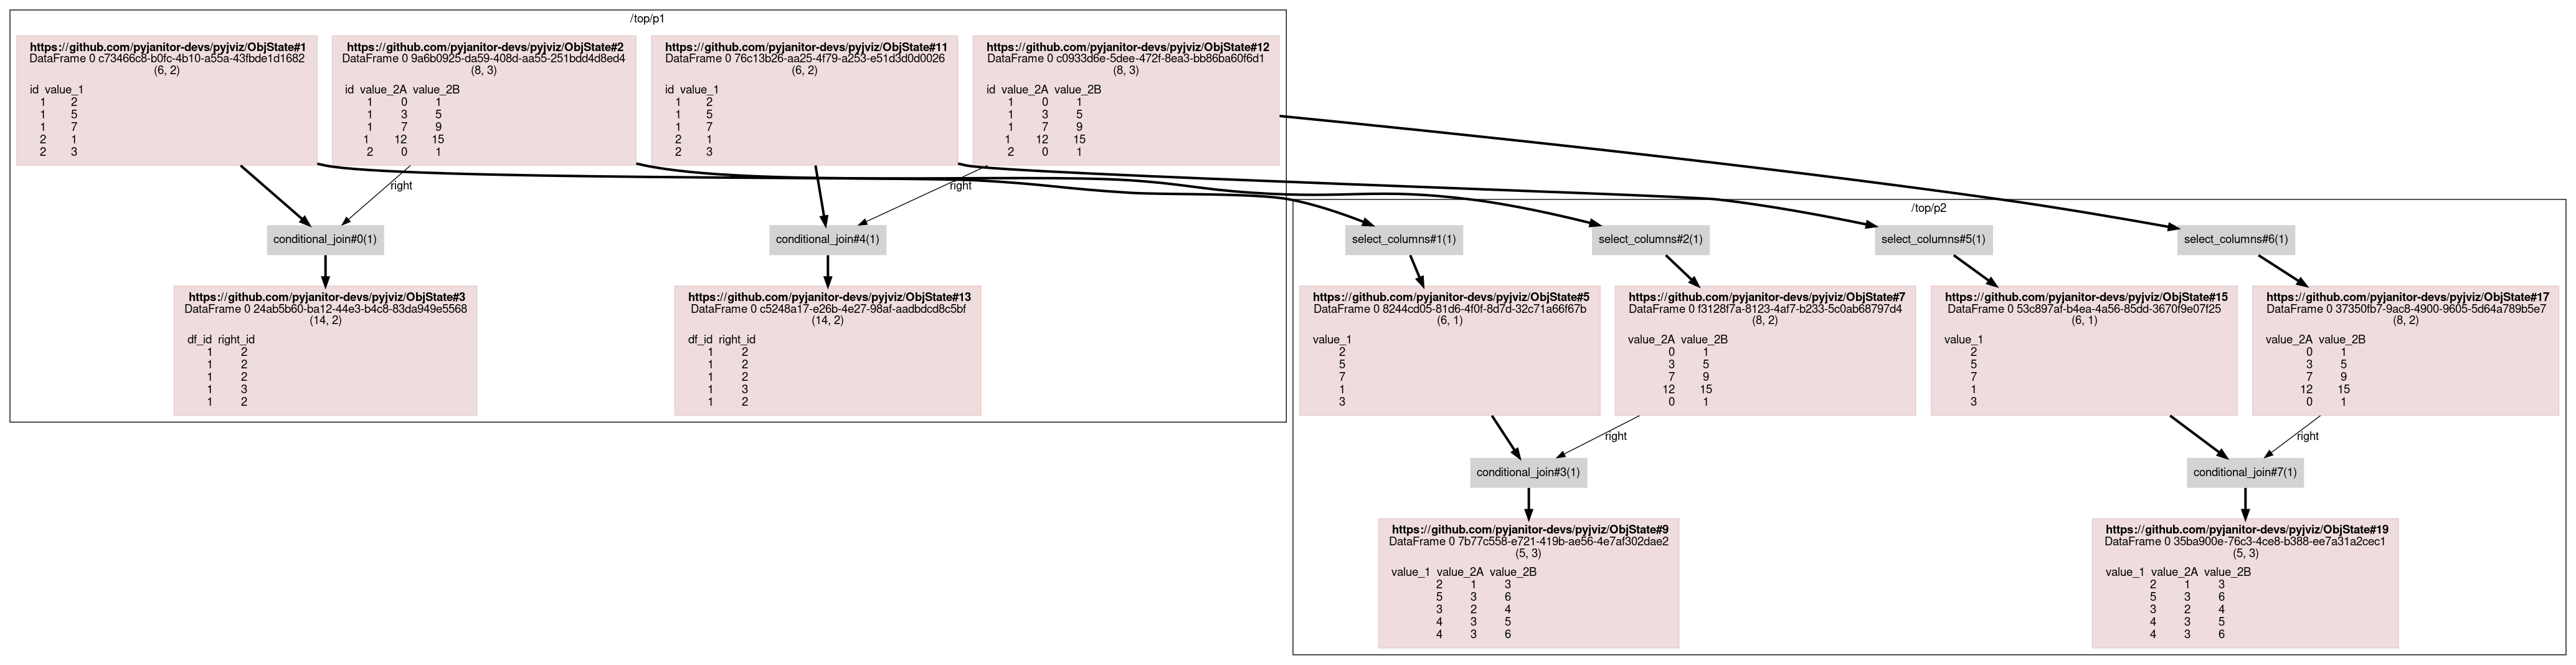

In [4]:
#print(pyjviz.triple_store.out_fd.getvalue()[:200])
p1.show(vertical=True)
#C.show()